In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import skdsp.signal.discrete as ds
import numpy as np
import sympy as sp
import scipy.fftpack as fftp
from ipywidgets import fixed, interact, interactive, IntSlider, FloatSlider, Checkbox, \
ToggleButton, ToggleButtons, HBox, VBox
from IPython.display import display

In [2]:
Nw = IntSlider(value=16, min=2, max=32, step=1, continuous_update=False, description='N:')
kw = IntSlider(value=1, min=0, max=32, step=1, continuous_update=False, description='width:')
ow = FloatSlider(value=0, min=-1.0, max=1.0, step=0.1, continuous_update=False, description='offset:')
sw = IntSlider(value=0, min=-64, max=64, step=1, continuous_update=False, description='shift:')
cw = ToggleButton(value=True, description='DFS centrada')
ww = ToggleButtons(options=['Tren de deltas', 'Diente de sierra', 'Cuadrada'], description='Señal:')
def dsfdemo(signal='Tren de deltas', N=8, width=0, offset=0, shift=0, center=True):
    if width > N:
        raise ValueError('width debe ser menor que N')
    if signal == 'Tren de deltas':
        # s = 0.5 + 0.5*ds.Square(N, 1)
        s = ds.DeltaTrain(N)
        kw.disabled = True
    if signal == 'Diente de sierra':
        s = ds.Sawtooth(N, width)
        kw.disabled = False
    elif signal == 'Cuadrada':
        s = ds.Square(N, width)
        kw.disabled = False
    s = offset + (s >> shift)
    npts = 32
    n = np.arange(-npts, npts+1)
    plt.figure(figsize=(20, 7))
    plt.subplot(2, 2, (1, 2))
    plt.stem(n, s[-npts:npts+1], markerfmt='bo', linefmt='b-', basefmt='k-')
    plt.axis([-npts-0.5, npts+0.5, -2.1, 2.1])
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')
    plt.grid(True)
    X = s.dfs(N, force=True)
    X.real[np.isclose(np.real(X), 0)] = 0
    X.imag[np.isclose(np.imag(X), 0)] = 0
    if center:
        X = fftp.fftshift(X)
        kidx = np.arange(-int(N/2), int((N-1)/2)+1)
    else:
        kidx = np.arange(0, N)
    plt.subplot(2, 2, 3)
    mX = np.abs(X)
    plt.stem(kidx, mX)
    min_ = min(0, np.min(mX))
    max_ = np.max(mX)
    dr = min(1.0, (max_ - min_))
    plt.axis([kidx[0]-0.5, kidx[-1]+0.5, min_-0.15*dr, max_+0.15*dr])
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    plt.grid(True)
    plt.subplot(2, 2, 4)
    plt.stem(kidx, np.angle(X))
    plt.axis([kidx[0]-0.5, kidx[-1]+0.5, -np.pi-0.5, np.pi+0.5])
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    plt.grid(True)
ws = HBox(children=[VBox(children=[ww, Nw, kw]), VBox(children=[cw, ow, sw])])
w = interactive(dsfdemo, signal=ww, N=Nw, width=kw, offset=ow, shift=sw, center=cw);

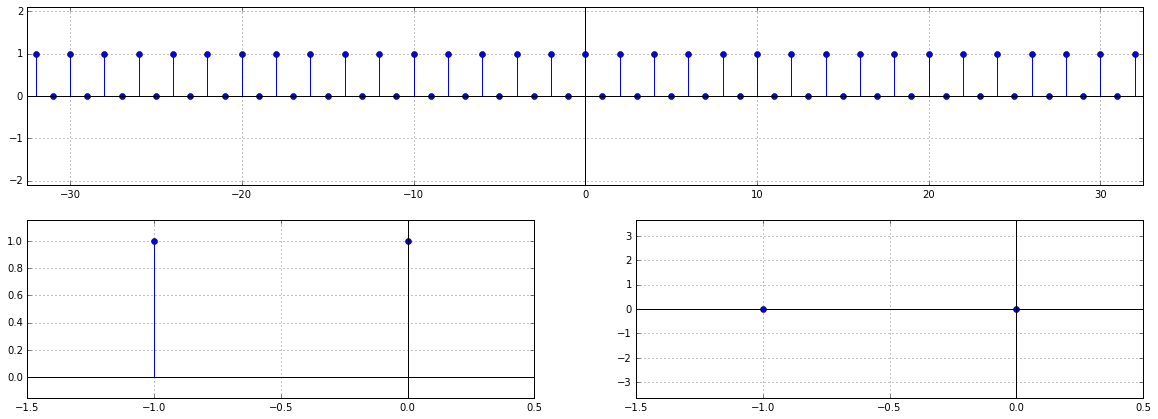

In [3]:
display(ws)

In [7]:
N = 16
S = []
for k in range(1, N+1):
    s = 0
    for k0 in range(0, k):
        s += ds.Exponential(sp.exp(sp.I*sp.S.Pi*2*k0/N))
    S.append(s/N)

In [17]:
def dfsexp(N=16, k=1):
    #s = 0
    #for k0 in range(0, k):
    #    s += ds.Exponential(sp.exp(sp.I*sp.S.Pi*2*k0/N))
    #s = s/N
    s = S[k-1]
    n = np.arange(-50, 50)
    X = s.dfs(N, force=True)
    X.real[np.isclose(X.real, 0)] = 0
    X.imag[np.isclose(X.imag, 0)] = 0
    plt.figure(figsize=(20, 3))
    plt.subplot(121)
    plt.stem(n, np.real(s[n]), markerfmt='bo', linefmt='b-', basefmt='k-')
    plt.stem(n, np.imag(s[n]), markerfmt='ro', linefmt='r-', basefmt='k-')
    plt.axis([n[0]-0.5, n[-1]+0.5, -1.1, 1.1])
    plt.grid(True)
    plt.legend(['parte real', 'parte imaginaria'], loc='lower right')
    plt.subplot(122)
    k = np.arange(0, N)
    plt.stem(k, np.abs(X))
    plt.axis([-0.5, 15.5, -0.1, 1.1])
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    plt.grid(True)

In [15]:
# %load ../functions/dfsexp2.py
def dfsexp2(N=16, k=1):
    #s = 0
    #for k0 in range(0, k):
    #    s += ds.Exponential(sp.exp(sp.I*sp.S.Pi*2*k0/N))
    #s = s/N
    s = S[k-1]
    n = np.arange(-50, 50)
    X = s.dfs(N, force=True)
    X.real[np.isclose(X.real, 0)] = 0
    X.imag[np.isclose(X.imag, 0)] = 0
    plt.figure(figsize=(20, 3))
    plt.subplot(121)
    plt.stem(n, np.real(s[n]), markerfmt='bo', linefmt='b-', basefmt='k-')
    plt.stem(n, np.imag(s[n]), markerfmt='ro', linefmt='r-', basefmt='k-')
    plt.axis([n[0]-0.5, n[-1]+0.5, -1.1, 1.1])
    plt.grid(True)
    plt.subplot(122)
    k = np.arange(0, N)
    plt.stem(k, np.abs(X))
    plt.axis([-0.5, 15.5, -0.1, 1.1])
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    plt.grid(True)

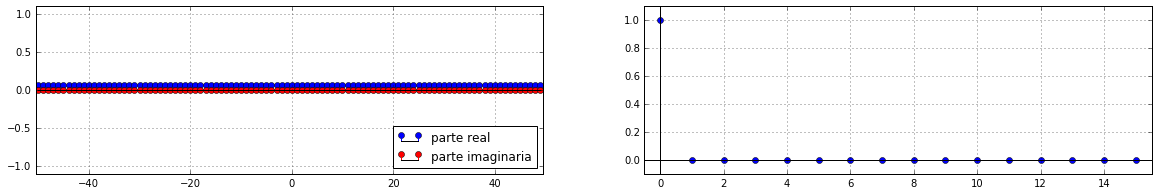

In [18]:
from ipywidgets import interact, Label, HBox, VBox
kw = IntSlider(value=1, min=1, max=16, step=1, continuous_update=False, description='width:')
d2 = interactive(dfsexp, N=fixed(16), k=kw)
display(d2)